# Two approaches to fibonacci and their time complexities

In [1]:
from time import time
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def fib(n): # O(2 ^ n) time , really ø(1.618 ^ n)
    if n <= 1:
        return n
    return fib(n - 1) + fib(n - 2)

def fast_fib(n, x = 1, y = 1): # O(n) time
    if n <= 1:
        return n
    if n == 2:
        return y if y > x else x
    elif n % 2 == 0:
        return fast_fib(n - 1, x, y + x)
    else:
        return fast_fib(n - 1, x + y, y)
    
def memo_fib(n, seen = {0:0, 1:1}): # O(n) time
    if n not in seen:
        seen[n] = memo_fib(n - 1) + memo_fib(n - 2)
    return seen[n]

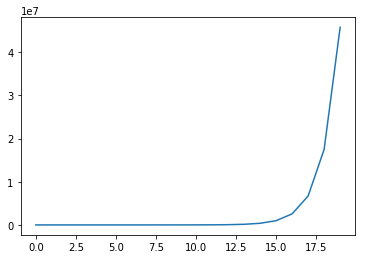

In [3]:
now = 0
def time_fib(n):
    global now
    now += 1
    if n <= 1:
        return now
    return time_fib(n - 1) + time_fib(n - 2)

times = []
for i in range(20):
    times.append(time_fib(i))
    now = 0
plt.plot(times)

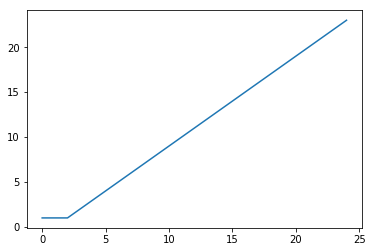

In [4]:
now = 0
def time_fast_fib(n, x = 1, y = 1): # O(n) time
    global now
    now += 1
    if n <= 1:
        return now
    if n == 2:
        return now
#         return y if y > x else x
    elif n % 2 == 0:
        return time_fast_fib(n - 1, x, y + x)
    else:
        return time_fast_fib(n - 1, x + y, y)
times = []
for i in range(25):
    times.append(time_fast_fib(i))
    now = 0
plt.plot(times)

Text(0.5, 0, 'iteration of fib')

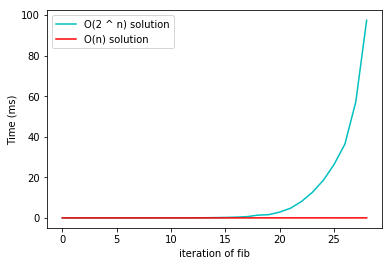

In [5]:
def fib_time_of_n(n):
    slow_times = []
    fast_times = []
    for i in range(n):
        time_now = time()
        fib(i)
        slow_times.append(time() - time_now)
        time_now = time()
        fast_fib(i)
        fast_times.append(time() - time_now)
    return slow_times, fast_times
slow, fast = fib_time_of_n(29)
plt.plot(np.array(slow) * 1000, color = 'c', label='O(2 ^ n) solution')
plt.plot(np.array(fast) * 1000, color = 'r', label='O(n) solution')
plt.legend()
plt.ylabel('Time (ms)')
plt.xlabel('iteration of fib')

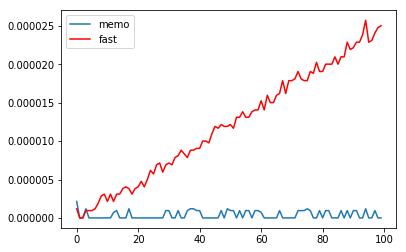

In [78]:
memo = []
fast = []
for i in range(100):
    time_now = time()
    memo_fib(i)
    memo.append(time() - time_now)
    time_now = time()
    fast_fib(i)
    fast.append(time() - time_now)
plt.plot(memo, label='memo')
plt.plot(fast, color='r', label='fast')
plt.legend()

 - How long does appending take?
 - Every attempt has a different outcome
 - does more/less memory get allocated sometimes?
 - is the size random?
 - does it matter what numbers are being added?
 - meaning will the first time stamp have an effect on the rest?

In [ ]:
for z in range(5):
    arr = []
    t = time()
    for i in range(16):
        arr.append(time() - t)
        t = time()
    plt.plot(arr[1:], label = z + 1)
plt.legend()

In [20]:
t = time()
j = 40
z = fib(j)
f'fib({j}) : {z}, time: {time() - t}'

'fib(40) : 102334155, time: 29.351946115493774'

In [22]:
t = time()
j = 43
z = fib(j)
f'fib({j}) : {z}, time: {time() - t}'

'fib(43) : 433494437, time: 124.83199572563171'